<a href="https://colab.research.google.com/github/tfredrick112/mnist-models/blob/master/MNIST_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!nvidia-smi

Sun Dec 29 06:53:26 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    419MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [77]:
pip install keras

In [0]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [0]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

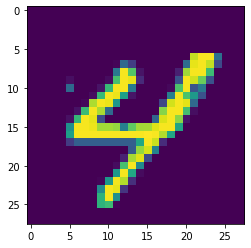

In [81]:
plt.imshow(X_train[89]) # to see some random training example

In [82]:
Y_train[89] # label for the above image

4

In [83]:
X_train[0].shape # shape of one image

(28, 28)

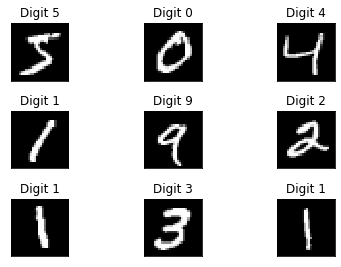

In [84]:
# We will plot 9 images to see what the data looks like.
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap = 'gray', interpolation=None)
  plt.title("Digit {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

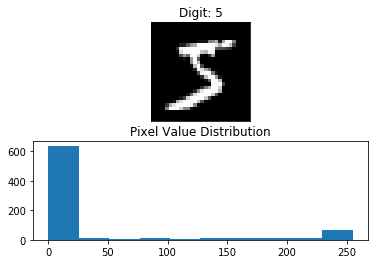

In [85]:
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(Y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

##### Normalization is necessary in order to convert the pixel values to lie between 0 and 1. It helps in speeding up the training process. It also reduces the chances of getting stuck in some local optima. Moreover, we will also unroll the 28 x 28 vector into a one dimensional vector with 784 values and we will treat this as our input vector.

In [86]:
print("Original shape of X_train: ",X_train.shape)
print("Original shape of Y_train: ",Y_train.shape)
print("Original shape of X_test: ",X_test.shape)
print("Original shape of Y_test: ",Y_test.shape)

Original shape of X_train:  (60000, 28, 28)
Original shape of Y_train:  (60000,)
Original shape of X_test:  (10000, 28, 28)
Original shape of Y_test:  (10000,)


In [87]:
# building the input vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

# printing the final shapes of X_train and X_test
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [88]:
# let us now convert the ground truth labels into one-hot vectors.
# we can use the to_categorical function from keras.utils.np_utils
print("Original shape of Y_train: ",Y_train.shape)
n_classes = 10
Y_train = np_utils.to_categorical(Y_train, num_classes=n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Original shape of Y_train:  (60000,)
Shape after one-hot encoding:  (60000, 10)


The input vector has 784 values. We will feed this into a neural network with 2 hidden layers, each having 512 neurons. The output layer has 10 neurons, as we have 10 classes to predict.

In [0]:
# we build a Sequential Model using keras
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2513 - acc: 0.9238 - val_loss: 0.1076 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0999 - acc: 0.9688 - val_loss: 0.0725 - val_acc: 0.9789
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0730 - acc: 0.9775 - val_loss: 0.0690 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0571 - acc: 0.9817 - val_loss: 0.0675 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0457 - acc: 0.9850 - val_loss: 0.0764 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0425 - acc: 0.9862 - val_loss: 0.0651 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0330 - acc: 0.9889 - val_loss: 0.0838 - val_acc

In [0]:
model.save('MNIST_1.h5')

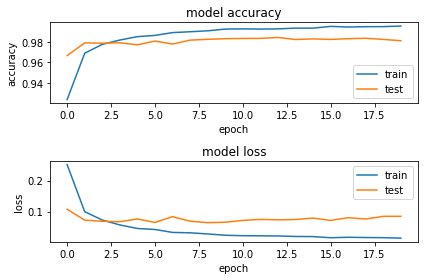

In [100]:
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [101]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.08484305098944851
Test Accuracy 0.981


In [0]:
Y_predicted = model.predict(X_test)

In [103]:
np.argmax(Y_predicted[0])

7

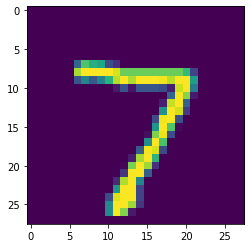

In [104]:
plt.imshow(X_test[0].reshape(28, 28))

In [0]:
Y_check = np.array([np.argmax(test) for test in Y_test])

In [0]:
mnist_model = load_model('MNIST_1.h5')
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_check)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_check)[0]

In [128]:
len(correct_indices)

9810

In [129]:
len(incorrect_indices)

190

In [0]:
# Let us see what kind of images the model is predicting incorrectly

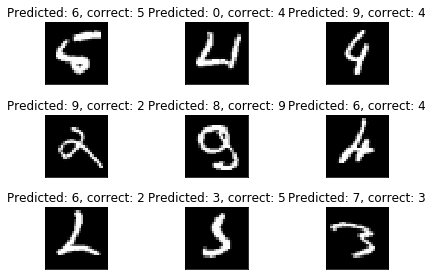

In [137]:
j = 0
for i in incorrect_indices[:9]:
  j += 1
  plt.subplot(3, 3, j)
  plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.title("Predicted: {}, correct: {}".format(predicted_classes[i], Y_check[i]))
plt.tight_layout()